# Запросы корректировки, соединение таблиц

Структура и наполнение таблиц:

In [ ]:
Таблица book
+---------+-----------------------+-----------+----------+--------+--------+
| book_id | title                 | author_id | genre_id | price  | amount |
+---------+-----------------------+-----------+----------+--------+--------+
| 1       | Мастер и Маргарита    | 1         | 1        | 670.99 | 3      |
| 2       | Белая гвардия         | 1         | 1        | 540.50 | 5      |
| 3       | Идиот                 | 2         | 1        | 460.00 | 10     |
| 4       | Братья Карамазовы     | 2         | 1        | 799.01 | 3      |
| 5       | Игрок                 | 2         | 1        | 480.50 | 10     |
| 6       | Стихотворения и поэмы | 3         | 2        | 650.00 | 15     |
| 7       | Черный человек        | 3         | 2        | 570.20 | 6      |
| 8       | Лирика                | 4         | 2        | 518.99 | 2      |
+---------+-----------------------+-----------+----------+--------+--------+
Таблица supply
+-----------+-----------------------+------------------+--------+--------+
| supply_id | title                 | author           | price  | amount |
+-----------+-----------------------+------------------+--------+--------+
| 1         | Доктор Живаго         | Пастернак Б.Л.   | 380.80 | 4      |
| 2         | Черный человек        | Есенин С.А.      | 570.20 | 6      |
| 3         | Белая гвардия         | Булгаков М.А.    | 540.50 | 7      |
| 4         | Идиот                 | Достоевский Ф.М. | 360.80 | 3      |
| 5         | Стихотворения и поэмы | Лермонтов М.Ю.   | 255.90 | 4      |
| 6         | Остров сокровищ       | Стивенсон Р.Л.   | 599.99 | 5      |
+-----------+-----------------------+------------------+--------+--------+
Таблица author                          Таблица genre
+-----------+------------------+	+----------+-------------+			
| author_id | name_author      |	| genre_id | name_genre  |			
+-----------+------------------+	+----------+-------------+			
| 1         | Булгаков М.А.    |	| 1        | Роман       |			
| 2         | Достоевский Ф.М. |	| 2        | Поэзия      |			
| 3         | Есенин С.А.      |	| 3        | Приключения |			
| 4         | Пастернак Б.Л.   |	+----------+-------------+			
| 5         | Лермонтов М.Ю.   |							
+-----------+------------------+		

### 69 Запросы на обновление, связанные таблицы

Для книг, которые уже есть на складе (в таблице `book`), но по другой цене, чем в поставке (`supply`),  необходимо в таблице `book` увеличить количество на значение, указанное в поставке,  и пересчитать цену. А в таблице `supply` обнулить количество этих книг. Формула для пересчета цены:

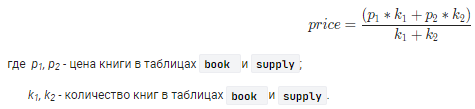

In [ ]:
UPDATE book
  JOIN author ON book.author_id = author.author_id
  JOIN supply ON book.title = supply.title 
              AND author.name_author = supply.author

   SET book.amount = book.amount + supply.amount,
       supply.amount = 0,
       book.price = (book.price * book.amount + supply.price * supply.amount)/(book.amount + supply.amount)
 WHERE book.price != supply.price;

SELECT * FROM book;
SELECT * FROM supply;

### 70 Запросы на добавление, связанные таблицы

Включить новых авторов в таблицу `author` с помощью запроса на добавление, а затем вывести все данные из таблицы `author`.  Новыми считаются авторы, которые есть в таблице supply, но нет в таблице author.

In [ ]:
INSERT INTO author(name_author)
SELECT author
  FROM supply LEFT JOIN author 
       ON supply.author = author.name_author
 WHERE name_author IS NULL;

SELECT * FROM author;

### 71 Запрос на добавление, связанные таблицы

Добавить новые книги из таблицы `supply` в таблицу `book`. Затем вывести для просмотра таблицу `book`.

In [ ]:
INSERT INTO book(title, author_id, price, amount)
SELECT title, 
       author_id, 
       price, 
       amount
  FROM author INNER JOIN supply 
       ON author.name_author = supply.author
 WHERE amount <> 0;

SELECT * FROM book;

### 72 Запрос на обновление, вложенные запросы

Занести для книги «Стихотворения и поэмы» Лермонтова жанр «Поэзия», а для книги «Остров сокровищ» Стивенсона - «Приключения». (Использовать два запроса).

In [ ]:
UPDATE book
   SET genre_id = 2
 WHERE book_id = 10;

UPDATE book
   SET genre_id = 3
 WHERE book_id = 11;
    
SELECT * FROM book;

### 73 Каскадное удаление записей связанных таблиц

Удалить всех авторов и все их книги, общее количество книг которых меньше 20.

In [ ]:
DELETE FROM author
 WHERE author_id IN (SELECT author_id
                       FROM book
                      GROUP BY author_id
                     HAVING SUM(amount) < 20);

SELECT * FROM author;
SELECT * FROM book;

### 74 Удаление записей главной таблицы с сохранением записей в зависимой

Удалить все жанры, к которым относится меньше 4-х книг. В таблице `book` для этих жанров установить значение Null.

In [ ]:
DELETE FROM genre
 WHERE genre_id IN(SELECT genre_id
                     FROM book
                    GROUP BY genre_id
                   HAVING COUNT(title) < 4);
    
SELECT * FROM genre;
SELECT * FROM book;

### 75 Удаление записей, использование связанных таблиц

Удалить всех авторов, которые пишут в жанре "Поэзия". Из таблицы `book` удалить все книги этих авторов. В запросе для отбора авторов использовать полное название жанра, а не его id.

In [ ]:
DELETE FROM author
 USING author
       JOIN book 
       ON author.author_id = book.author_id
 WHERE genre_id IN(SELECT genre_id
                     FROM genre
                    WHERE name_genre = 'Поэзия');
    
SELECT * FROM author;
SELECT * FROM book;